<div style="text-align:center">
    <h1>
        VSL RL : SUMO Simulation (DQL)
    </h1>
</div>

In [1]:
import traci
import numpy as np

In [2]:
sumoConfig = "C://PHD//RL_VSL_2023//rl_vsl_sumo//gym_sumo//envs//sumo_configs//maroc.sumocfg"
sumoBinary = "C://Program Files (x86)//Eclipse//Sumo//bin//sumo-gui.exe"
metadata = {'render.modes': ['human', 'rgb_array','state_pixels']}
logConfig = "C://PHD//RL_VSL_2023//rl_vsl_sumo//gym_sumo//envs//results//logsumo_noVsl.txt"
sumoCmd = [sumoBinary, "-c", sumoConfig, "--quit-on-end", "true",  "--log", logConfig, "--start"]
simulation_step = 0
episode = 0
traci.start(sumoCmd)



 Retrying in 1 seconds


(20, 'SUMO 1.18.0')

In [3]:
my_dictionary = {}
while episode < 10:
    while simulation_step < 7000:
        traci.simulationStep()
        simulation_step += 1
        vehicles =  traci.vehicle.getIDList()
        ttc =[]
        meanTtc= 0
        for vehicle in vehicles:
            if(traci.vehicle.getRoadID(vehicle) == "141131874"):
                vehcileSpeed = traci.vehicle.getSpeed(vehicle)
                vehicleTtc= traci.vehicle.getParameter(vehicle, "device.ssm.minTTC")
                #print(f"Vehicle id :{vehicle}, speed: {vehcileSpeed}, TTC: {vehicleTtc}")
                if(vehicleTtc != ''):
                    if(float(vehicleTtc) < 1000):
                        ttc.append(float(vehicleTtc))
        meanTtc = np.mean(ttc)
        print(meanTtc)
        my_dictionary[simulation_step] = meanTtc
    episode += 1
print(my_dictionary)


c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\rhanizar\anaconda3\envs\my_rl\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
7.79
7.79
38.91
36.309999999999995
131.1475
55.3675
47.1375
47.1375
46.05
46.05
46.05
46.05
46.05
46.05
46.05
46.05
46.05
42.959999999999994
42.959999999999994
42.91
42.15599999999999
36.98
36.66833333333333
36.66833333333333
37.51384615384615
30.64909090909091
27.184615384615384
27.184615384615384
24.456
24.456
24.456
24.456
24.456
24.456
24.456
24.456
24.456
24.456
24.456
27.33529411764706
26.601176470588232
25.396470588235296
26.358571428571427
26.358571428571427
26.358571428571427
26.358571428571427
26.061999999999998
25.981999999999996
32.61055555555556
32.61055555555556
35.176875
35.176875
35.176875
35.176875
35.176875
35.176875
42.43944444444444
40.41611111111111
38.211666666666666
36.07055555555556
36.07055555555556
36.07055555555556
34.08894736842105
29.50318181818181
28.34727272727272
28.34727272727272
28.34727272727272
28.34727272727272
28.00181818181818
34.944761904761904
47.76173913043478
47.76

In [4]:
print(my_dictionary.items())
print(my_dictionary.keys())

dict_items([(1, nan), (2, nan), (3, nan), (4, nan), (5, nan), (6, nan), (7, nan), (8, nan), (9, nan), (10, nan), (11, nan), (12, nan), (13, nan), (14, nan), (15, nan), (16, nan), (17, nan), (18, nan), (19, nan), (20, nan), (21, 7.79), (22, 7.79), (23, 38.91), (24, 36.309999999999995), (25, 131.1475), (26, 55.3675), (27, 47.1375), (28, 47.1375), (29, 46.05), (30, 46.05), (31, 46.05), (32, 46.05), (33, 46.05), (34, 46.05), (35, 46.05), (36, 46.05), (37, 46.05), (38, 42.959999999999994), (39, 42.959999999999994), (40, 42.91), (41, 42.15599999999999), (42, 36.98), (43, 36.66833333333333), (44, 36.66833333333333), (45, 37.51384615384615), (46, 30.64909090909091), (47, 27.184615384615384), (48, 27.184615384615384), (49, 24.456), (50, 24.456), (51, 24.456), (52, 24.456), (53, 24.456), (54, 24.456), (55, 24.456), (56, 24.456), (57, 24.456), (58, 24.456), (59, 24.456), (60, 27.33529411764706), (61, 26.601176470588232), (62, 25.396470588235296), (63, 26.358571428571427), (64, 26.358571428571427)

In [5]:
def clean_nans_from_dict(d):
    '''For a dictionary where each key holds a list or np.array of values, remove all nan values.
    Based on: https://stackoverflow.com/questions/24068306/is-there-a-way-to-remove-nan-from-a-dictionary-filled-with-data'''
    
    # create empty dict to put the cleaned-up dictionary key:value pairs
    cleaned_d = {}
    
    # loop through each key in the original dict
    for key_name in d:
        # for each item in the values for this key, if it is not nan then add to new list
        if not np.isnan(d[key_name]):
            item_cleaned = d[key_name]
            # add this list of cleaned items to the cleaned dictionary
            cleaned_d[key_name] = item_cleaned
        
    # return the cleaned dictionary
    return cleaned_d

In [11]:
import csv
new_dictionary = clean_nans_from_dict(my_dictionary)
with open('ttc_log_novsl1.csv', 'w') as f:
    for key in new_dictionary.keys():
        f.write("%s,%s\n"%(key,new_dictionary[key]))

{1: nan, 2: nan, 3: nan, 4: nan, 5: nan, 6: 15.44, 7: 15.44, 8: 15.44, 9: 13.945, 10: 13.945, 11: 13.945, 12: 13.945, 13: 13.945, 14: 13.945, 15: 13.945, 16: 13.945, 17: 13.945, 18: 13.945, 19: 13.945, 20: 13.945, 21: 13.945, 22: 13.945, 23: 13.945, 24: 13.945, 25: 13.945, 26: 13.945, 27: 13.945, 28: 13.945, 29: 15.756666666666668, 30: 14.655, 31: 36.336, 32: 22.711999999999996, 33: 22.711999999999996, 34: 22.711999999999996, 35: 22.711999999999996, 36: 18.961999999999996, 37: 18.961999999999996, 38: 18.961999999999996, 39: 18.961999999999996, 40: 18.02, 41: 18.02, 42: 18.02, 43: 18.02, 44: 18.02, 45: 18.02, 46: 19.134, 47: 20.098333333333333, 48: 20.098333333333333, 49: 20.098333333333333, 50: 20.098333333333333, 51: 20.098333333333333, 52: 20.098333333333333, 53: 20.098333333333333, 54: 20.098333333333333, 55: 18.212857142857143, 56: 18.212857142857143, 57: 18.212857142857143, 58: 18.212857142857143, 59: 37.075, 60: 37.075, 61: 37.075, 62: 37.075, 63: 37.075, 64: 33.91555555555556, 6

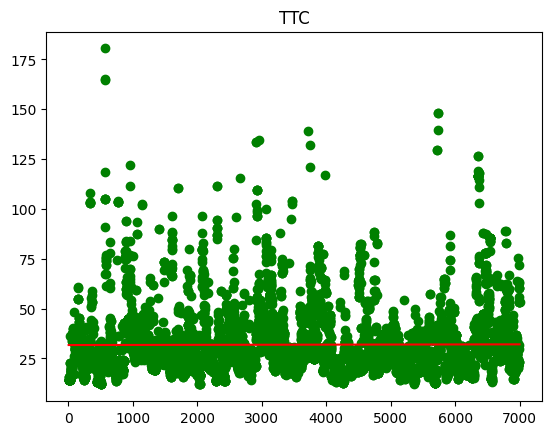

In [76]:
import matplotlib.pyplot as plt 

print(my_dictionary)
new_dictionary = clean_nans_from_dict(my_dictionary)
print(new_dictionary)
myList = new_dictionary.items()
myList = sorted(myList) 
x, y = zip(*myList) 
plt.xlim([0,500])
plt.plot(x, y, 'o', color='green')
x= tuple(map(int, x))
y= [x for x in y if np.isnan(x) == False]
print (x)
print (y)
m, b = np.polyfit(x, y, 1)
print (m)
print (b)
z = tuple(m * elem + b for elem in x)
print (z)
#use red as color for regression line
plt.plot(x, z, color='red')
plt.title('TTC')
plt.show()


In [8]:
traci.close()